In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import datasets
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Setup Complete
/kaggle/input/training-data/data.csv
/kaggle/input/test-data/test_data.csv


# Gathering data

In [2]:
training_data = pd.read_csv('/kaggle/input/training-data/data.csv')
test_data = pd.read_csv('/kaggle/input/test-data/test_data.csv')

# Assessing data

In [3]:
# view data sets
training_data

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Class
0,0,10,Female,30,19,3
1,1,20,Female,35,23,3
2,2,200,Male,30,137,3
3,3,153,Female,44,78,1
4,4,4,Female,23,16,3
...,...,...,...,...,...,...
155,155,58,Male,69,44,2
156,156,151,Male,43,78,1
157,157,135,Male,20,73,1
158,158,144,Female,32,76,3


In [4]:
test_data

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$)
0,0,1,Male,19,15
1,1,147,Male,48,77
2,2,159,Male,34,78
3,3,177,Male,58,88
4,4,198,Male,32,126
5,5,83,Male,67,54
6,6,76,Male,26,54
7,7,86,Male,48,54
8,8,81,Male,57,54
9,9,158,Female,30,78


In [5]:
# droping "unnamed: 0" column from both data sets  
training_data = training_data.drop('Unnamed: 0',axis = 1)
test_data = test_data.drop('Unnamed: 0',axis = 1)

In [6]:
#review data to check the changes
training_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Class
0,10,Female,30,19,3
1,20,Female,35,23,3
2,200,Male,30,137,3
3,153,Female,44,78,1
4,4,Female,23,16,3


In [7]:
test_data.head()

,CustomerID,Genre,Age,Annual Income (k$)
0,1,Male,19,15
1,147,Male,48,77
2,159,Male,34,78
3,177,Male,58,88
4,198,Male,32,126


In [8]:
# describe the data
training_data.describe()

,CustomerID,Age,Annual Income (k$),Class
count,160.000000,160.000000,160.000000,160.000000
mean,98.675000,39.112500,59.962500,2.031250
std,59.264735,14.094911,27.006612,0.747506
min,2.000000,18.000000,15.000000,1.000000
25%,45.750000,29.000000,39.000000,1.000000
50%,98.500000,36.000000,60.500000,2.000000
75%,150.250000,49.000000,78.000000,3.000000
max,200.000000,70.000000,137.000000,3.000000


In [9]:
#viewing info about data 
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          160 non-null    int64 
 1   Genre               160 non-null    object
 2   Age                 160 non-null    int64 
 3   Annual Income (k$)  160 non-null    int64 
 4   Class               160 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.4+ KB


In [10]:
#changing data type of Class to category
training_data = training_data.astype({ "Class":'category'})

In [11]:
#check changing dtypes 
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerID          160 non-null    int64   
 1   Genre               160 non-null    object  
 2   Age                 160 non-null    int64   
 3   Annual Income (k$)  160 non-null    int64   
 4   Class               160 non-null    category
dtypes: category(1), int64(3), object(1)
memory usage: 5.4+ KB


In [12]:
training_data['Class'].value_counts()

2    71
3    47
1    42
Name: Class, dtype: int64

In [13]:
training_data['Genre'].value_counts()

Female    96
Male      64
Name: Genre, dtype: int64

# visualize data to see insights

<AxesSubplot:xlabel='Age', ylabel='Density'>

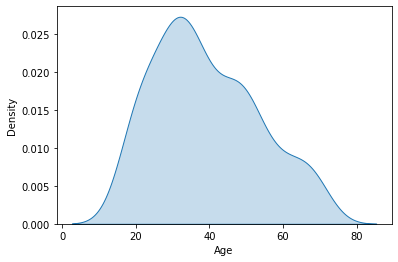

In [14]:
sns.kdeplot(data=training_data['Age'], shade=True)

**From the plot above we can conclude that most of the customers are in the middle age (between 20-50)**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

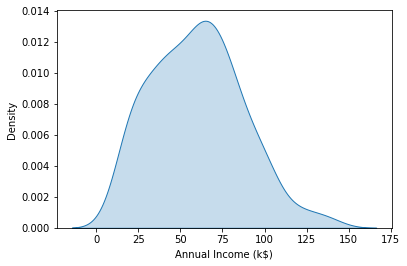

In [15]:
sns.kdeplot(data=training_data['Annual Income (k$)'], shade=True)


**From the plot above we can conclude that most of the customers are having annual income between (25-90)(k$)**

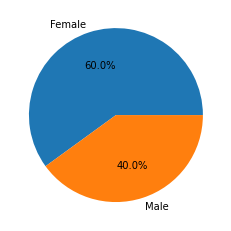

In [16]:
x=training_data['Genre'].value_counts()
plt.pie(x,labels=['Female','Male'],autopct='%1.1f%%')
plt.show()

<Figure size 1080x576 with 0 Axes>

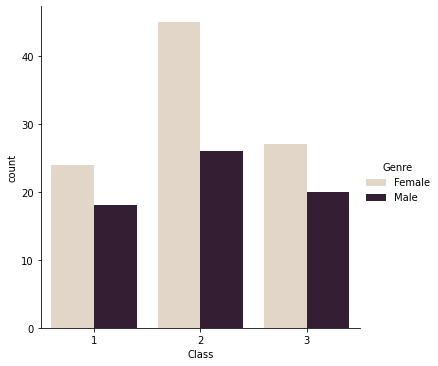

In [17]:
plt.figure(figsize=(15,8))
sns.catplot(x="Class",hue='Genre', kind="count", palette="ch:.25", data=training_data)

**from this two plots we can notice that the majority of the customers are females *(in all classes)***

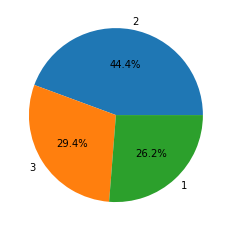

In [18]:
x=training_data['Class'].value_counts()
plt.pie(x,labels=['2','3','1'],autopct='%1.1f%%')
plt.show()

**from this pie chart we noticed that most of our customers are in the second class**

<AxesSubplot:xlabel='Class', ylabel='Age'>

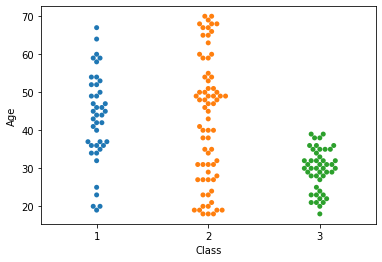

In [19]:
sns.swarmplot(x='Class', y='Age',data=training_data)

**from this plot we noticed that the ages of customers in class 3 all of them under 40 years**

<AxesSubplot:xlabel='Class', ylabel='Annual Income (k$)'>

<Figure size 720x1224 with 0 Axes>

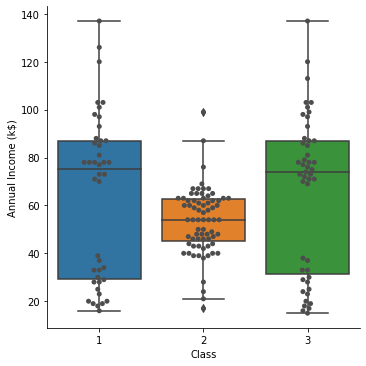

In [20]:
plt.figure(figsize=(10,17))
sns.catplot(x="Class", y="Annual Income (k$)", kind="box", data=training_data)
sns.swarmplot(x='Class', y="Annual Income (k$)", data=training_data, color="0.3")
#plt.figure(figsize=(7,8))
#sns.violinplot(x="Class", y="Annual Income (k$)", data=training_data, inner=None)

*  **from the previous mixing plot we concluded that customers in class 1 & 3 75% of them are having < 90k in the year**

*  **and in class 2 almost 100% of them are having < 90k in the year**

# Generating Model

In [21]:
#Convert Genre from object to int (training_data)
training_data.Genre = training_data.Genre.astype('category')

label_encoder = preprocessing.LabelEncoder()
training_data['Genre'] = label_encoder.fit_transform(training_data['Genre'])

#Convert Genre from object to int (test_data)
test_data.Genre = test_data.Genre.astype('category')
label_encoder1 = preprocessing.LabelEncoder()
test_data['Genre'] = label_encoder1.fit_transform(test_data['Genre'])

In [22]:
# Create feature array 
feartures = ['Genre','Age','Annual Income (k$)']
X = training_data[feartures]
y = training_data['Class']

In [23]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [24]:
#Generate a k-NN model using neighbors value.
knn = KNeighborsClassifier(n_neighbors=8)
#train the model using the training sets
knn.fit(X_train, y_train)
#predic the class
y_pred = knn.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:" ,knn.score(X_test,y_test))

Accuracy: 0.90625


# Accuracy: 0.90625

**predicting the class for the test set**

In [26]:
feartures1 = ['Genre','Age','Annual Income (k$)']
X1 = test_data[feartures1]
_test = X1
predictions = knn.predict(_test)
predictions

array([3, 1, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 3, 1, 1, 2, 2, 3, 1,
       1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1])

In [27]:
# add class to data_test
df =pd.DataFrame(test_data)
df['Class'] = predictions
#convert class to categorical 
test_data = test_data.astype({ "Class":'category'})
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerID          40 non-null     int64   
 1   Genre               40 non-null     int64   
 2   Age                 40 non-null     int64   
 3   Annual Income (k$)  40 non-null     int64   
 4   Class               40 non-null     category
dtypes: category(1), int64(4)
memory usage: 1.5 KB


In [28]:
#changing genre 0 to female 1 to male after modeling
test_data["Genre"].replace({1: "Male", 0: "Female"}, inplace=True)
test_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Class
0,1,Male,19,15,3
1,147,Male,48,77,1
2,159,Male,34,78,3
3,177,Male,58,88,1
4,198,Male,32,126,1


In [29]:
#check changes in data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerID          40 non-null     int64   
 1   Genre               40 non-null     object  
 2   Age                 40 non-null     int64   
 3   Annual Income (k$)  40 non-null     int64   
 4   Class               40 non-null     category
dtypes: category(1), int64(3), object(1)
memory usage: 1.5+ KB
